<a href="https://colab.research.google.com/github/hosseindamavandi/Fake-News-Detection/blob/main/Note-Books/ANN/in_progress.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
%cd drive/MyDrive/Neuromatch

/content/drive/MyDrive/Neuromatch


In [ ]:
"""
data manipulatig
"""
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

"""
natural language processing
"""
import re
import nltk
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
true_data = pd.read_csv('datasets/True.csv')
fake_data = pd.read_csv('datasets/Fake.csv')
true_data.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
true_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [ ]:
fake_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [ ]:
# Adding labels
true_data["label"] = np.ones(len(true_data),dtype=int)
fake_data["label"] = np.zeros(len(fake_data),dtype=int)

true_data.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [ ]:
data = pd.concat((true_data,fake_data),axis=0)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.1+ MB
None


In [ ]:
data = data.sample(frac=1)
data.head(10)

,title,text,subject,date,label
1833,This Reporter Just Won The Biggest Prize In J...,The winners of the 2017 Pulitzer Prize have be...,News,"April 10, 2017",0
11390,Syrian rebel groups reject Russian-sponsored S...,AMMAN (Reuters) - Syrian rebel groups on Monda...,worldnews,"December 25, 2017",1
12238,WOW! TRUMP/CLINTON CAMPAIGNS GO AT IT In Post-...,This is a clip of Kellyanne Conway and Jen Pal...,politics,"Dec 2, 2016",0
6091,Senate energy panel delays Tuesday votes on Pe...,WASHINGTON (Reuters) - The Senate energy commi...,politicsNews,"January 24, 2017",1
3041,U.S. lawmakers urge Trump to press India's Mod...,WASHINGTON (Reuters) - Leading U.S. congressme...,politicsNews,"June 24, 2017",1
18016,Militants attack checkpoint in Somalia's Puntl...,"BOSASO, Somalia (Reuters) - Islamist al Shabaa...",worldnews,"October 9, 2017",1
1281,White House says it can't lawfully pay Obamaca...,WASHINGTON (Reuters) - President Donald Trump ...,politicsNews,"October 12, 2017",1
7134,Oklahoma Governor Fallin speaks to Trump about...,(Reuters) - Oklahoma Governor Mary Fallin met ...,politicsNews,"November 21, 2016",1
1406,During Russia Meeting Trump Explicitly Bragge...,In a meeting Trump held with two Russian offic...,News,"May 19, 2017",0
4839,Trumpkins Seriously Think Their Hero Will Ret...,This is so horribly amazing that it defies des...,News,"August 31, 2016",0


In [ ]:
data["subject"].value_counts()

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

In [ ]:
data = pd.get_dummies(data,columns=["subject"])
data.head()

,title,text,date,label,subject_Government News,subject_Middle-east,subject_News,subject_US_News,subject_left-news,subject_politics,subject_politicsNews,subject_worldnews
1833,This Reporter Just Won The Biggest Prize In J...,The winners of the 2017 Pulitzer Prize have be...,"April 10, 2017",0,0,0,1,0,0,0,0,0
11390,Syrian rebel groups reject Russian-sponsored S...,AMMAN (Reuters) - Syrian rebel groups on Monda...,"December 25, 2017",1,0,0,0,0,0,0,0,1
12238,WOW! TRUMP/CLINTON CAMPAIGNS GO AT IT In Post-...,This is a clip of Kellyanne Conway and Jen Pal...,"Dec 2, 2016",0,0,0,0,0,0,1,0,0
6091,Senate energy panel delays Tuesday votes on Pe...,WASHINGTON (Reuters) - The Senate energy commi...,"January 24, 2017",1,0,0,0,0,0,0,1,0
3041,U.S. lawmakers urge Trump to press India's Mod...,WASHINGTON (Reuters) - Leading U.S. congressme...,"June 24, 2017",1,0,0,0,0,0,0,1,0


In [ ]:
data = data.drop("date",axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 1833 to 11518
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   title                    44898 non-null  object
 1   text                     44898 non-null  object
 2   label                    44898 non-null  int64 
 3   subject_Government News  44898 non-null  uint8 
 4   subject_Middle-east      44898 non-null  uint8 
 5   subject_News             44898 non-null  uint8 
 6   subject_US_News          44898 non-null  uint8 
 7   subject_left-news        44898 non-null  uint8 
 8   subject_politics         44898 non-null  uint8 
 9   subject_politicsNews     44898 non-null  uint8 
 10  subject_worldnews        44898 non-null  uint8 
dtypes: int64(1), object(2), uint8(8)
memory usage: 1.7+ MB


In [ ]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

True

In [ ]:
from nltk.stem.porter import *
new_text = []
pattern = "[^a-zA-Z]"
lemma = nltk.WordNetLemmatizer()
stemmer = PorterStemmer()
i = 0
for txt in data.text:
    txt = re.sub(pattern, " ", txt)  # Cleaning
    txt = txt.lower()  # Lowering
    txt = nltk.word_tokenize(txt)  # Tokenizing
    txt = [lemma.lemmatize(word) for word in txt]  # Lemmatizing
    txt = [stemmer.stem(word) for word in txt]  # Stemming
    txt = " ".join(txt)
    new_text.append(txt)
    if i == 9:
      break
    i += 1

new_text[1]

'amman reuter syrian rebel group on monday reject russia s plan sochi confer on syria say moscow wa seek to bypass a u n base geneva peac process and blame russia for commit war crime in the war torn countri in a statement by around rebel group who includ some of the militari faction who particip in earlier round of geneva peac talk they said moscow had not put pressur on the syrian govern to reach a polit settlement russia ha not contribut one step to eas the suffer of syrian and ha not pressur the regim that it claim it is a guarantor by move in ani real path toward a solut the rebel statement said russia which ha emerg a the domin player in syria after a major militari intervent over two year ago receiv back from turkey and iran for hold a syrian nation dialogu congress in the russian citi of sochi on jan russia is an aggressor countri that ha commit war crime against syrian it stood with the regim militarili and defend it polit and over seven year prevent u n condemn of syrian pres

In [ ]:
len(new_text)

10

In [ ]:
# vectorizer_title = CountVectorizer(stop_words="english",max_features=1000)
vectorizer_text = CountVectorizer(stop_words="english",max_features=500)

# title_matrix = vectorizer_title.fit_transform(new_title).toarray()
text_matrix = vectorizer_text.fit_transform(new_text).toarray()

In [ ]:
text_matrix.shape

(6, 500)

In [ ]:
print(text_matrix[0])

[ 0  3  0  0  0  3  0  0  0  0  3  1  0  0  0  0  0  3  5  1  0  0  0  0
  0  0  3  0  1  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  1  1
  4  2  0  0  0  0  0  1  0  0  0  0  0  2  1  0  1  0  1  0  0  0  2  0
  0  0  3  0  0  1  0  0  2  0  7  0  0  3  0  1  0  0  0  1  2  0  1  0
  0  0  1  1  0  0  0  2  0  0  0  0  0  0  1  1  2  0  0  0  0  2  0  0
  1  0  0  0  0  0  0  0  1  0  3  1  0  0  0  0  0  0  0  0  0  2  1  0
  1  0  2  0  1  1  0  2  2  0  0  3  1  0  0  0  2  0  0  0  2  0  0  0
  4  4  0  0  0  2  0  0  0  0  0  1  1  1  0  1  0  2  1  1  0  0  1  0
  3  1  0  1  2  1  1  0  0  3  0  0  0  1  0  1  0  1  2  0  0  1  0  0
  0  5  2  2  0  3  3  2  0  0  0  0  0  0  1  0  0  0  0  1  1  0  2  2
  1  0  0  0  0  1  0  1  0  0  0  3  1  1  1  0  0  1  0  0  1  1  1  0
  1  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  1  1  0  0  1  0  0
  0  0  0  0  0  0  0  0  2  0  0  1  0  0  1  0  1  0  0  1  0  0  1  0
  1  0  1  0  0  2  0  0  0  0  0  1  0  0  0  0  1

In [ ]:
from nltk.stem.porter import *
new_text = []
pattern = "[^a-zA-Z]"
lemma = nltk.WordNetLemmatizer()
stemmer = PorterStemmer()

for txt in data.text:
    txt = re.sub(pattern, " ", txt)  # Cleaning
    txt = txt.lower()  # Lowering
    txt = nltk.word_tokenize(txt)  # Tokenizing
    txt = [lemma.lemmatize(word) for word in txt]  # Lemmatizing
    txt = [stemmer.stem(word) for word in txt]  # Stemming
    txt = " ".join(txt)
    new_text.append(txt)

new_text[0]

In [ ]:
from nltk.stem.porter import *
new_title = []
lemma = nltk.WordNetLemmatizer()
stemmer = PorterStemmer()
i = 0
for txt in data.title:
    txt = re.sub(pattern," ",txt) # Cleaning
    txt = txt.lower() # Lowering
    txt = nltk.word_tokenize(txt) # Tokenizing
    txt = [lemma.lemmatize(word) for word in txt] # Lemmatizing
    txt = [stemmer.stem(word) for word in txt]  # Stemming
    txt = " ".join(txt)

    stemmer = PorterStemmer()
    txt = stemmer.stem(txt)

    new_title.append(txt)

    if i == 9:
      break
    i += 1

new_title[0]

'thi report just won the biggest prize in journal for expos trump s lie detail'

In [ ]:
vectorizer_title = CountVectorizer(stop_words="english",max_features=1000)
vectorizer_text = CountVectorizer(stop_words="english",max_features=4000)

title_matrix = vectorizer_title.fit_transform(new_title).toarray()
text_matrix = vectorizer_text.fit_transform(new_text).toarray()

print("Finished")

In [ ]:
data.drop(["title","text"],axis=1,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 1715 to 1267
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   label                    44898 non-null  int64
 1   subject_Government News  44898 non-null  uint8
 2   subject_Middle-east      44898 non-null  uint8
 3   subject_News             44898 non-null  uint8
 4   subject_US_News          44898 non-null  uint8
 5   subject_left-news        44898 non-null  uint8
 6   subject_politics         44898 non-null  uint8
 7   subject_politicsNews     44898 non-null  uint8
 8   subject_worldnews        44898 non-null  uint8
dtypes: int64(1), uint8(8)
memory usage: 1.0 MB


In [ ]:
data.head()

,label,subject_Government News,subject_Middle-east,subject_News,subject_US_News,subject_left-news,subject_politics,subject_politicsNews,subject_worldnews
1715,0,0,0,1,0,0,0,0,0
23005,0,0,1,0,0,0,0,0,0
8536,1,0,0,0,0,0,0,1,0
14516,1,0,0,0,0,0,0,0,1
4374,0,0,0,1,0,0,0,0,0


In [ ]:
print(data.shape)
print(len(new_title))
# print(title_matrix.shape)
# print(text_matrix.shape)
print(len(new_text))

(44898, 11)
10
10


In [ ]:
new_labels = data.label[0:10]

In [ ]:
print(len(new_labels))

10


In [ ]:
# Creating Y
y = data.label[0:10]
# Creating X
# x = np.concatenate((np.array(data.drop("label",axis=1)),title_matrix,text_matrix),axis=1)
# x = np.concatenate((np.array(data.drop("label",axis=1)),new_title,new_text),axis=1)
pd.DataFrame(data = [new_title, new_text, y]).T


,0,1,2
0,thi report just won the biggest prize in journ...,the winner of the pulitz prize have been annou...,0
1,syrian rebel group reject russian sponsor soch...,amman reuter syrian rebel group on monday reje...,1
2,wow trump clinton campaign go at it in post el...,thi is a clip of kellyann conway and jen palme...,0
3,senat energi panel delay tuesday vote on perri...,washington reuter the senat energi committe sa...,1
4,u s lawmak urg trump to press india s modi on ...,washington reuter lead u s congressman have ca...,1
5,milit attack checkpoint in somalia s puntland ...,bosaso somalia reuter islamist al shabaab mili...,1
6,white hous say it can t law pay obamacar subsidi,washington reuter presid donald trump will sto...,1
7,oklahoma governor fallin speak to trump about ...,reuter oklahoma governor mari fallin met on mo...,1
8,dure russia meet trump explicitli brag he fire...,in a meet trump held with two russian offici a...,0
9,trumpkin serious think their hero will return ...,thi is so horribl amaz that it defi descript c...,0


In [ ]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import gensim
from gensim.models import Word2Vec

# Sample text
# text = new_text[0]
text = ""

# Tokenize the text
tokens = word_tokenize(text.lower())

# Remove stop words
stop_words = set(stopwords.words("english"))
filtered_tokens = [token for token in tokens if token not in stop_words]

# Stem the tokens (you can use lemmatization as well if you prefer)
stemmer = PorterStemmer()
stemmed_tokens = [stemmer.stem(token) for token in filtered_tokens]

# Train Word2Vec model
model = Word2Vec([stemmed_tokens], vector_size=100, window=5, min_count=1, workers=4)

# Function to vectorize the text
def vectorize_text(text, model):
    vectors = [model.wv[word] for word in text if word in model.wv]
    if not vectors:
        # If none of the words are in the model's vocabulary, return None
        return None
    # Average the word vectors to get the text representation
    avg_vector = sum(vectors) / len(vectors)
    return avg_vector

# Vectorize the text
vectorized_text = vectorize_text(stemmed_tokens, model)

# Print the vectorized text
print(vectorized_text)


[-6.21622894e-04  5.81453496e-04  3.21174273e-04  6.17284793e-04
 -4.84096163e-05 -1.23384083e-03  6.32527983e-04  1.78432080e-03
 -9.81856720e-04 -8.03467701e-04  3.99752287e-04 -8.18339700e-04
 -5.20749774e-04  3.72588256e-04 -2.01709059e-04 -5.56393876e-04
  5.36952750e-04 -5.42123395e-04 -8.76641890e-04 -1.81140797e-03
  2.00748167e-04  2.55335559e-04  1.10754161e-03 -4.25778009e-04
  3.45753884e-04 -1.19173324e-04 -2.26734250e-04  2.48062512e-04
 -9.55015363e-04 -2.35658827e-05  4.02993406e-04 -8.58068379e-05
  7.56077643e-04 -7.94473453e-04 -6.19695580e-04  7.25357095e-04
  6.99132739e-04 -5.99246123e-04 -4.95753658e-04 -9.01562453e-04
 -2.75123224e-04 -4.55531524e-04 -8.06332217e-04 -2.84186954e-05
  6.44886401e-04 -1.00788333e-04 -3.57575831e-04  1.62650016e-04
  4.26397106e-04  7.19858275e-04  2.73166632e-04 -2.12155486e-04
 -1.64161524e-04 -1.21595098e-04 -1.78980597e-04  1.18168202e-04
  4.55073838e-04 -3.53026408e-04 -7.50332896e-04  7.32920598e-04
  4.00206045e-05 -8.42459

In [ ]:
# Creating Y
y = data.label
# Creating X
# x = np.concatenate((np.array(data.drop("label",axis=1)),title_matrix,text_matrix),axis=1)
x = np.concatenate((np.array(data.drop("label",axis=1)),new_title,new_text),axis=1)

NameError: ignored

In [ ]:
print(x.shape)
print(y.shape)

In [ ]:
from sklearn.model_selection import train_test_split

# Train Test Split
X_train,X_test,Y_train,Y_test = train_test_split(x,np.array(y),test_size=0.25,random_state=1)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

In [ ]:
"""
pytorch
"""

import torch
import torch.nn as nn
"""
visualization tools
"""

import matplotlib.pyplot as plt
import seaborn as sns

"""
train test split
"""
from sklearn.model_selection import train_test_split

In [ ]:
# print("ANN")
# class ANN(nn.Module):

#     def __init__(self):

#         super(ANN, self).__init__()
#         self.linear1 = nn.Linear(5008, 2000)
#         self.relu1 = nn.ReLU()
#         self.dropout1 = nn.Dropout(0.5)  # Add dropout layer

#         self.linear2 = nn.Linear(2000, 500)
#         self.relu2 = nn.ReLU()
#         self.dropout2 = nn.Dropout(0.5)

#         self.linear3 = nn.Linear(500, 100)
#         self.relu3 = nn.ReLU()
#         self.dropout3 = nn.Dropout(0.5)

#         self.linear4 = nn.Linear(100, 20)
#         self.relu4 = nn.ReLU()
#         self.dropout4 = nn.Dropout(0.5)

#         self.linear5 = nn.Linear(20, 2)


#     def forward(self,x):

#         out = self.linear1(x)
#         out = self.relu1(out)
#         out = self.dropout1(out)

#         out = self.linear2(out)
#         out = self.relu2(out)
#         out = self.dropout2(out)

#         out = self.linear3(out)
#         out = self.relu3(out)
#         out = self.dropout3(out)

#         out = self.linear4(out)
#         out = self.relu4(out)
#         out = self.dropout4(out)

#         out = self.linear5(out)

#         return out


# model = ANN()
# optimizer = torch.optim.Adam(model.parameters(),lr=0.01)
# # optimizer = torch.optim.Adam(model.parameters(), lr=0.01 * (0.1 ** (epoch // 10)))
# # optimizer = torch.optim.AdamW(model.parameters(), lr=0.01)


# error = nn.CrossEntropyLoss()

class ANN(nn.Module):

    def __init__(self):

        super(ANN,self).__init__() # Inhertiting

        self.linear1 = nn.Linear(5008,2000) # IN 5008 OUT 2000
        self.relu1 = nn.ReLU() # Actfunc 1
        # self.act_func = nn.LeakyReLU(0.01)

        self.linear2 = nn.Linear(2000,500) # IN 2000 OUT 500
        self.relu2 = nn.ReLU()

        self.linear3 = nn.Linear(500,100) # IN 500 OUT 100
        self.relu3 = nn.ReLU()

        self.linear4 = nn.Linear(100,20) # IN 100 OUT 20
        self.relu4 = nn.ReLU()

        self.linear5 = nn.Linear(20,2) # IN 20 OUT 2 | OUTPUT


    def forward(self,x):

        out = self.linear1(x) # Input Layer
        out = self.relu1(out)

        out = self.linear2(out) # Hidden Layer 1
        out = self.relu2(out)

        out = self.linear3(out) # Hidden Layer 2
        out = self.relu3(out)

        out = self.linear4(out) # Hidden Layer 3
        out = self.relu4(out)


        out = self.linear5(out) # Output Layer

        return out

    def compute_l1_loss(self, w):
        return torch.abs(w).sum()

    def compute_l2_loss(self, w):
        return torch.square(w).sum()


model = ANN()
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)
# optimizer = torch.optim.Adam(model.parameters(), lr=0.01 * (0.1 ** (epoch // 10)))
# optimizer = torch.optim.AdamW(model.parameters(), lr=0.01)


error = nn.CrossEntropyLoss()

In [ ]:
class ANN(nn.Module):

    def __init__(self):

        super(ANN,self).__init__() # Inhertiting

        self.linear1 = nn.Linear(5008,2000) # IN 5008 OUT 2000
        self.linear2 = nn.Linear(2000,500) # IN 2000 OUT 500
        self.linear3 = nn.Linear(500,100) # IN 500 OUT 100
        self.linear4 = nn.Linear(100,20) # IN 100 OUT 20
        self.linear5 = nn.Linear(20,2) # IN 20 OUT 2 | OUTPUT

        #* activation functions
        self.hidden_activation = nn.LeakyReLU()
        self.output_activation = nn.Softmax(dim=1)

    def forward(self,x):

        out = self.linear1(x) # Input Layer
        out = self.hidden_activation(out)

        out = self.linear2(out) # Hidden Layer 1
        out = self.hidden_activation(out)

        out = self.linear3(out) # Hidden Layer 2
        out = self.hidden_activation(out)

        out = self.linear4(out) # Hidden Layer 3
        out = self.hidden_activation(out)


        out = self.linear5(out) # Output Layer
        out = self.output_activation(out)
        return out

    def compute_l1_loss(self, w):
        return torch.abs(w).sum()

    def compute_l2_loss(self, w):
        return torch.square(w).sum()


model = ANN()
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)
# optimizer = torch.optim.Adam(model.parameters(), lr=0.01 * (0.1 ** (epoch // 10)))
# optimizer = torch.optim.AdamW(model.parameters(), lr=0.01)


error = nn.CrossEntropyLoss()

In [ ]:
# Converting numpy arrays into pytorch tensors
X_train = torch.Tensor(X_train)

# You must convert it into LongTensor. I did it once
Y_train = torch.Tensor(Y_train).type(torch.LongTensor)

X_test = torch.Tensor(X_test)
Y_test = torch.Tensor(Y_test)

# lambda_l1 = 0.001  # L1 regularization strength
# lambda_l2 = 0.001  # L2 regularization strength

# lambda_l1 = 0.0004
# lambda_l2 = 0.0003

l1_weight = 0.0004
l2_weight = 0.0003

EPOCHS = 2

for epoch in range(EPOCHS):
    optimizer.zero_grad()
    outs = model(X_train)
    loss = error(outs, Y_train)

    # L1 regularization
    l1_regularization = torch.tensor(0.)  # Initialize L1 regularization term
    l2_regularization = torch.tensor(0.)  # Initialize L2 regularization term

    parameters = []

    for parameter in model.parameters():
          parameters.append(parameter.view(-1))
    l1 = l1_weight * model.compute_l1_loss(torch.cat(parameters))
    l2 = l2_weight * model.compute_l2_loss(torch.cat(parameters))

    loss += l1
    loss += l2

    loss.backward()
    optimizer.step()

    print(f"Loss after iteration {epoch} is {loss}")

Loss after iteration 0 is 34.24184799194336
Loss after iteration 1 is 19.97905158996582
Loss after iteration 2 is 24.811893463134766
Loss after iteration 3 is 22.303133010864258
Loss after iteration 4 is 21.608562469482422
Loss after iteration 5 is 19.092405319213867
Loss after iteration 6 is 13.380526542663574
Loss after iteration 7 is 12.844831466674805
Loss after iteration 8 is 14.810904502868652
Loss after iteration 9 is 17.18545913696289
Loss after iteration 10 is 16.49056625366211
Loss after iteration 11 is 13.465786933898926
Loss after iteration 12 is 9.339693069458008
Loss after iteration 13 is 10.259374618530273
Loss after iteration 14 is 11.858139038085938
Loss after iteration 15 is 12.0786714553833
Loss after iteration 16 is 12.044183731079102
Loss after iteration 17 is 10.138078689575195
Loss after iteration 18 is 7.667336463928223
Loss after iteration 19 is 8.765429496765137


In [ ]:
# Importing metrics
from sklearn.metrics import accuracy_score,confusion_matrix


# Prediction
y_head = model(X_test)
print(y_head[0])
# Converting Prediction into labels
y_pred = torch.max(y_head,1)[1]
print(y_pred[0])

# Accuracy score
print("Model accuracy is ",accuracy_score(y_pred,Y_test))

tensor([-10.9333,  11.9223], grad_fn=<SelectBackward0>)
tensor(1)
Model accuracy is  0.6271714922048998


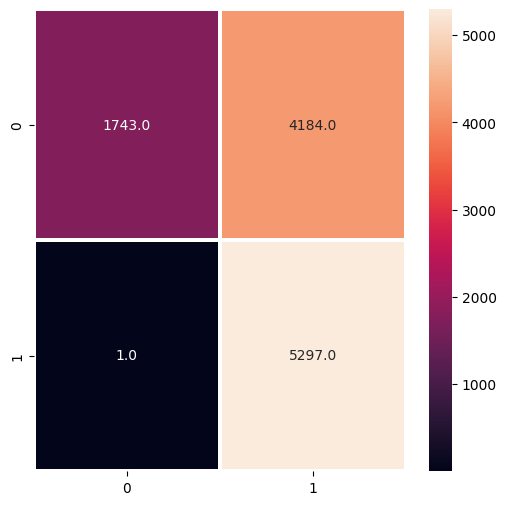

In [ ]:
confusion_matrix = confusion_matrix(y_pred=y_pred,y_true=Y_test)

fig,ax = plt.subplots(figsize=(6,6))
sns.heatmap(confusion_matrix,annot=True,fmt="0.1f",linewidths=1.5)
plt.show()